# Training Classification model without optimization techniques

In the optimization methods section we will be exploring some of the optimization techniques in pytorch and before that to comapre our results, let's train a 2 hidden layer neural notwork without any optimization Algorithms.

We aleardy defined most used functions in `utils.py` such as creating dataset, defining model etc to make thing simple and to mainly focus on training loops here 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import utils
import matplotlib.pyplot as plt
import numpy as np

Number of training examples: 480
Number of testing examples: 120
Shape of train set: torch.Size([480, 2])
Shape of test set: torch.Size([120, 2])


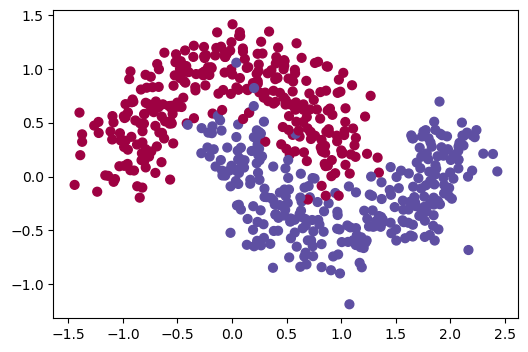

In [2]:
X_train, X_test, y_train, y_test = utils.create_dataset()

In [3]:
model = utils.create_classifier(2,1)
print(model)

SimpleClassifier(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


In [4]:
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters:", num_params)

Total number of trainable model parameters: 681


In [5]:
LEARNING_RATE = 0.01
EPOCHS = 2000

loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

train_losses = []
test_losses = []
train_accs = []
test_accs = []

for epoch in range(1, EPOCHS+1):
    #Forward propagation
    train_preds = model(X_train)
    train_loss = loss_fn(train_preds, y_train)
    # Calculating accuracy and saving training history
    train_acc = utils.calculate_accuracy(train_preds, y_train)
    train_losses.append(train_loss.item())
    train_accs.append(train_acc.item())
    #Backpropagation
    optimizer.zero_grad()
    train_loss.backward()
    #Gradient-descent step
    optimizer.step()
    
    #Predicting on test data
    with torch.no_grad():
        test_preds = model(X_test)
        test_loss = loss_fn(test_preds, y_test)
        ## Calculating accuracy and saving training history
        test_acc = utils.calculate_accuracy(test_preds, y_test)
        test_losses.append(test_loss.item())
        test_accs.append(test_acc.item())
        
    # Print training data
    if epoch%100==0:
        print(f'Epoch: {epoch} \t|' \
            f' Train loss: {np.round(train_loss.item(),3)} \t|' \
            f' Test loss: {np.round(test_loss.item(),3)} \t|' \
            f' Train acc: {np.round(train_acc.item(),2)} \t|' \
            f' Test acc: {np.round(test_acc.item(),2)}')
        
# Print final training and testing accuracy
print(f'Final Train Accuracy: {np.round(train_accs[-1],2)}')
print(f'Final Test Accuracy: {np.round(test_accs[-1],2)}')

Epoch: 100 	| Train loss: 0.68 	| Test loss: 0.68 	| Train acc: 0.51 	| Test acc: 0.47
Epoch: 200 	| Train loss: 0.669 	| Test loss: 0.668 	| Train acc: 0.51 	| Test acc: 0.47
Epoch: 300 	| Train loss: 0.657 	| Test loss: 0.654 	| Train acc: 0.51 	| Test acc: 0.47
Epoch: 400 	| Train loss: 0.635 	| Test loss: 0.632 	| Train acc: 0.62 	| Test acc: 0.64
Epoch: 500 	| Train loss: 0.606 	| Test loss: 0.602 	| Train acc: 0.73 	| Test acc: 0.76
Epoch: 600 	| Train loss: 0.572 	| Test loss: 0.568 	| Train acc: 0.77 	| Test acc: 0.77
Epoch: 700 	| Train loss: 0.538 	| Test loss: 0.535 	| Train acc: 0.78 	| Test acc: 0.78
Epoch: 800 	| Train loss: 0.509 	| Test loss: 0.507 	| Train acc: 0.79 	| Test acc: 0.8
Epoch: 900 	| Train loss: 0.484 	| Test loss: 0.483 	| Train acc: 0.8 	| Test acc: 0.81
Epoch: 1000 	| Train loss: 0.464 	| Test loss: 0.463 	| Train acc: 0.81 	| Test acc: 0.81
Epoch: 1100 	| Train loss: 0.446 	| Test loss: 0.446 	| Train acc: 0.82 	| Test acc: 0.81
Epoch: 1200 	| Train lo

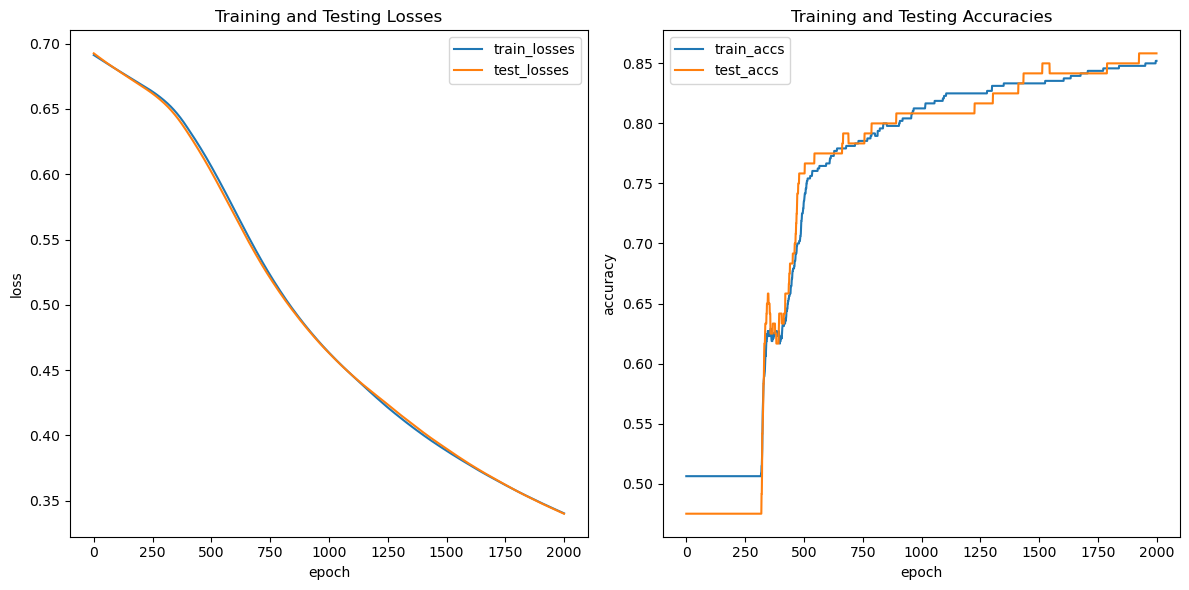

In [6]:
utils.plot_metrics(train_losses, test_losses, train_accs, test_accs)

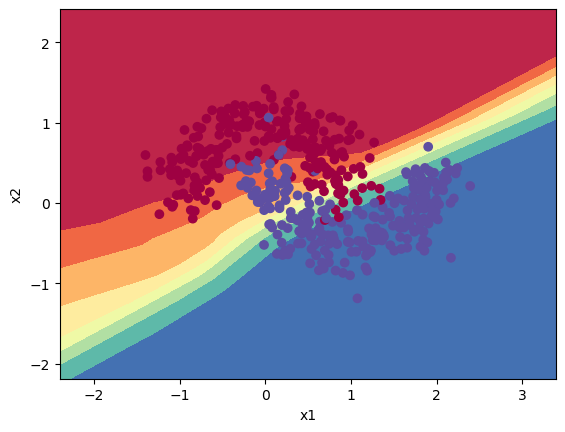

In [7]:
utils.plot_decision_boundary(model, X_train, y_train)

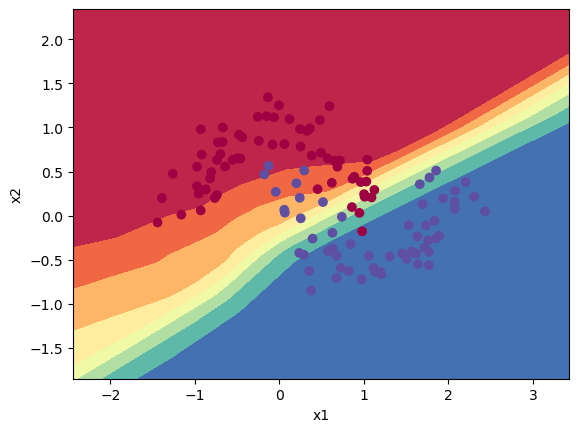

In [8]:
utils.plot_decision_boundary(model, X_test, y_test)